In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc

In [2]:
# Step 1: Load the dataset
data = pd.read_csv('final_data.csv')
data

,red,green,blue,label
0,20,139,240,Blue
1,174,83,72,Brown
2,144,249,131,Green
3,168,25,156,Pink
4,30,182,136,Green
...,...,...,...,...
5047,26,26,26,Black
5048,27,27,27,Black
5049,28,28,28,Black
5050,29,29,29,Black


In [3]:
# Step 2: Preprocessing (No normalization or regularization assumed in this example)
# Splitting the dataset into features (X) and labels (y)
X = data[['red', 'green', 'blue']]  # RGB values as features
y = data['label']  # The label (color name)

In [4]:
# Step 3: Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Step 4: Choose ML Algorithms and Training
# Model 1: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc, title='ROC Curve'):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

In [7]:

# Predicting using Random Forest
rf_predictions = rf_model.predict(X_test)
print("Random Forest Classification Report:\n")
print(classification_report(y_test, rf_predictions))
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_predictions)}\n")



Random Forest Classification Report:

              precision    recall  f1-score   support

       Black       1.00      0.79      0.88        14
        Blue       0.92      0.91      0.92       213
       Brown       0.86      0.87      0.87        78
       Green       0.91      0.95      0.93       301
        Grey       0.80      0.67      0.73        36
      Orange       0.70      0.80      0.75        35
        Pink       0.82      0.83      0.82       110
      Purple       0.73      0.75      0.74       102
         Red       0.81      0.67      0.74        52
       White       0.57      1.00      0.73         4
      Yellow       0.85      0.79      0.82        66

    accuracy                           0.86      1011
   macro avg       0.82      0.82      0.81      1011
weighted avg       0.86      0.86      0.86      1011

Random Forest Accuracy: 0.8595450049455984



In [12]:
# Model 2: k-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()  # Define the KNN model here
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

Best parameters for Random Forest: {'max_depth': 20, 'n_estimators': 100}
Best Random Forest Classification Report:

              precision    recall  f1-score   support

       Black       1.00      0.79      0.88        14
        Blue       0.92      0.91      0.92       213
       Brown       0.86      0.86      0.86        78
       Green       0.91      0.95      0.93       301
        Grey       0.80      0.67      0.73        36
      Orange       0.68      0.80      0.74        35
        Pink       0.83      0.83      0.83       110
      Purple       0.73      0.75      0.74       102
         Red       0.81      0.67      0.74        52
       White       0.57      1.00      0.73         4
      Yellow       0.85      0.79      0.82        66

    accuracy                           0.86      1011
   macro avg       0.82      0.82      0.81      1011
weighted avg       0.86      0.86      0.86      1011

Best Random Forest Accuracy: 0.8595450049455984

Best parameters for K

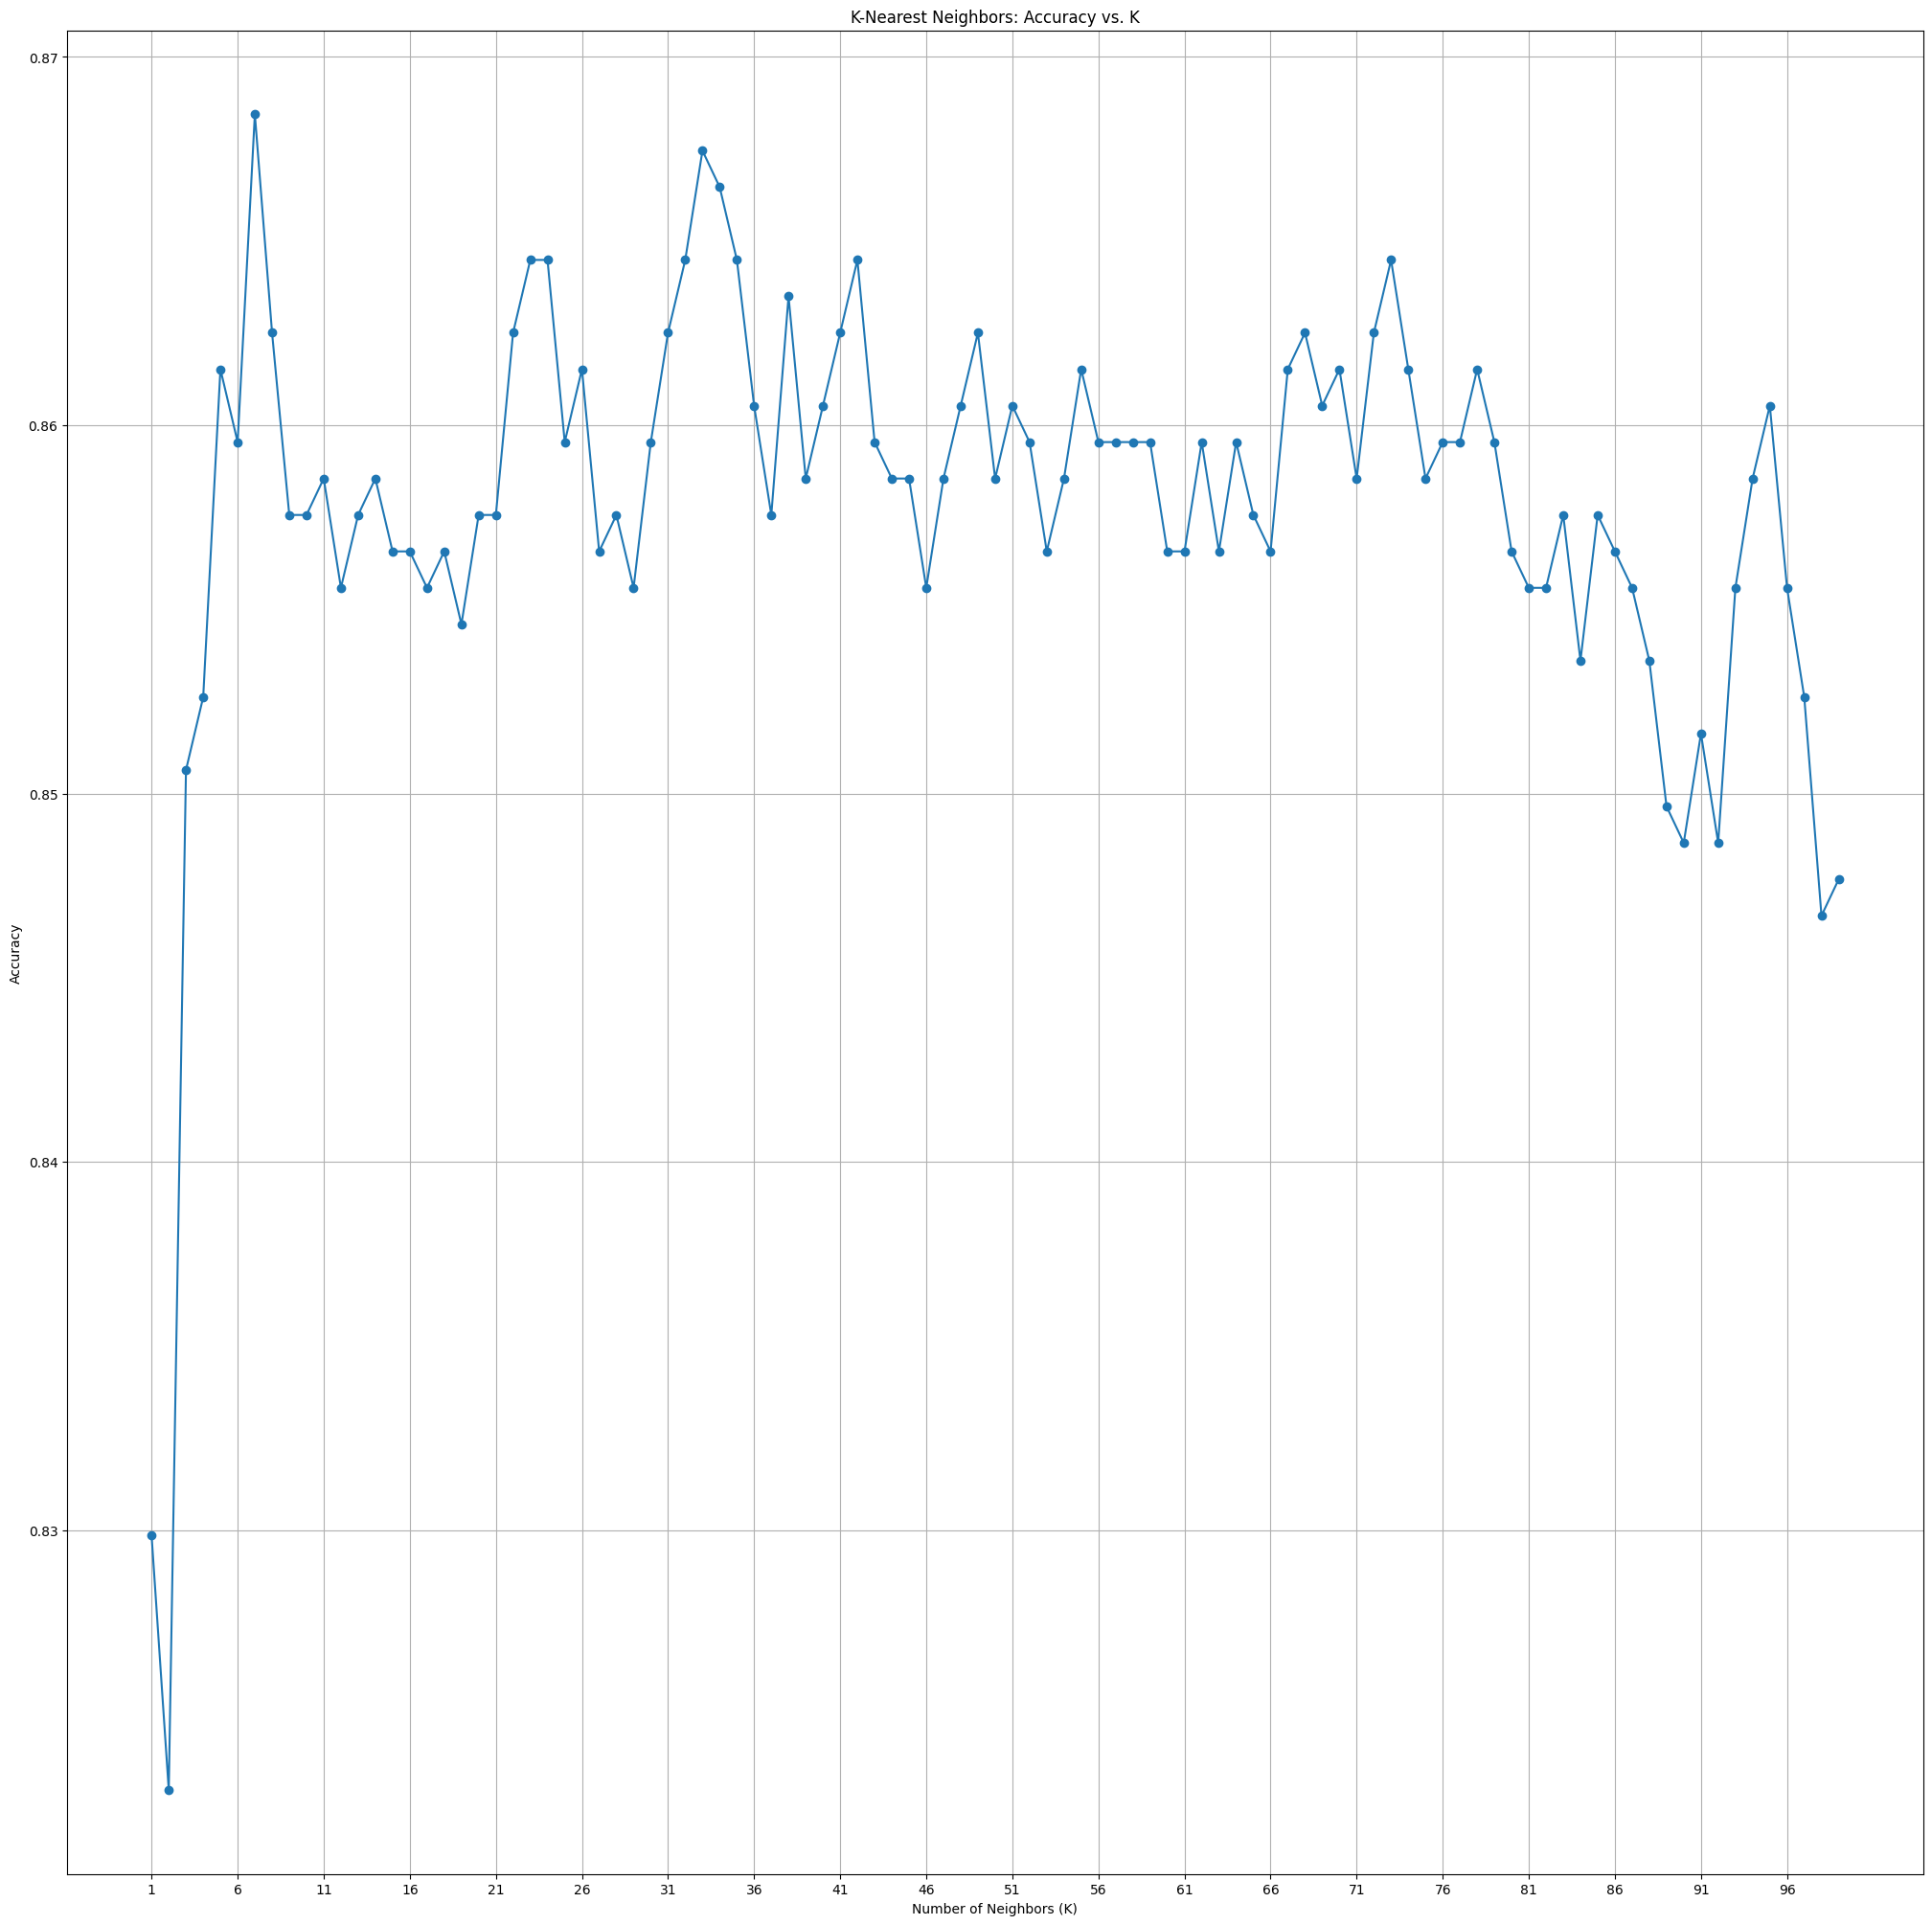

In [15]:
# Step 6: Fine Tuning (Example: Grid Search for Random Forest)
# Tuning hyperparameters for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)
best_rf_model = grid_search_rf.best_estimator_
rf_best_predictions = best_rf_model.predict(X_test)
print("Best Random Forest Classification Report:\n")
print(classification_report(y_test, rf_best_predictions))
print(f"Best Random Forest Accuracy: {accuracy_score(y_test, rf_best_predictions)}\n")

# Tuning hyperparameters for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

print("Best parameters for KNN:", grid_search_knn.best_params_)
best_knn_model = grid_search_knn.best_estimator_
knn_best_predictions = best_knn_model.predict(X_test)
print("Best KNN Classification Report:\n")
print(classification_report(y_test, knn_best_predictions))
print(f"Best KNN Accuracy: {accuracy_score(y_test, knn_best_predictions)}\n")
# Hyperparameter tuning for KNN
k_values = range(1, 100)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plotting accuracies for different K values
plt.figure(figsize=(25, 25))
plt.plot(k_values, accuracies, marker='o')
plt.title('K-Nearest Neighbors: Accuracy vs. K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(range(1, 100, 5))
plt.grid(True)
plt.show()

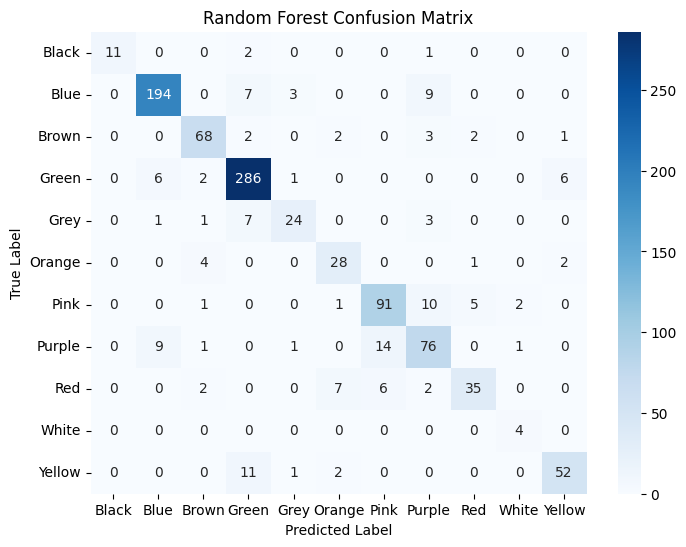

K-Nearest Neighbors Classification Report:

              precision    recall  f1-score   support

       Black       0.92      0.86      0.89        14
        Blue       0.92      0.93      0.92       213
       Brown       0.78      0.88      0.83        78
       Green       0.92      0.95      0.93       301
        Grey       0.83      0.67      0.74        36
      Orange       0.69      0.77      0.73        35
        Pink       0.82      0.85      0.83       110
      Purple       0.78      0.75      0.77       102
         Red       0.83      0.67      0.74        52
       White       0.57      1.00      0.73         4
      Yellow       0.88      0.70      0.78        66

    accuracy                           0.86      1011
   macro avg       0.81      0.82      0.81      1011
weighted avg       0.86      0.86      0.86      1011

KNN Accuracy: 0.8615232443125618



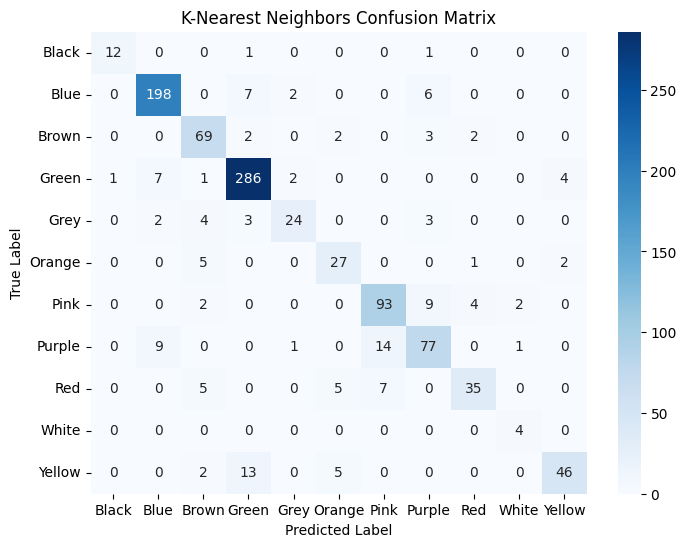

In [16]:
# Confusion Matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_predictions)
plot_confusion_matrix(rf_cm, classes=rf_model.classes_, title='Random Forest Confusion Matrix')

# Predicting using KNN
knn_predictions = knn_model.predict(X_test)
print("K-Nearest Neighbors Classification Report:\n")
print(classification_report(y_test, knn_predictions))
print(f"KNN Accuracy: {accuracy_score(y_test, knn_predictions)}\n")

# Confusion Matrix for KNN
knn_cm = confusion_matrix(y_test, knn_predictions)
plot_confusion_matrix(knn_cm, classes=knn_model.classes_, title='K-Nearest Neighbors Confusion Matrix')